In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import StandardScaler

In [14]:
df=pd.read_csv('../data/Jinshenlu2.txt',sep='\t',
              error_bad_lines=False, low_memory=False,
              usecols=['xuhao', 'year', 'diqu', 'jigou_1', 'jigou_2', 'jigou_3',
                       'core_guanzhi', 'pinji_detailed', 'pinji_numeric', 'unique_id', 'fangkeben_only', 'qiren'])

In [15]:
df.dropna(subset=['unique_id'], inplace=True)
df=df[(df['xuhao']<20000) & (df['qiren']=='民人') & (df['fangkeben_only']<0.5)]
df.describe(include='all')

,xuhao,year,diqu,jigou_1,jigou_2,jigou_3,core_guanzhi,pinji_detailed,pinji_numeric,unique_id,fangkeben_only,qiren
count,1.969975e+06,1.969975e+06,1969950,1959138,1598372,59582,1919929,1829174,1.854298e+06,1.969975e+06,1969975.0,1969975
unique,NaN,NaN,33,1101,3079,486,6160,30,NaN,NaN,NaN,1
top,NaN,NaN,京師,翰林院衙門,額外司員,至聖廟官,訓導,正八品,NaN,NaN,NaN,民人
freq,NaN,NaN,294981,44263,94288,12583,292749,359893,NaN,NaN,NaN,1969975
mean,8.325592e+03,1.873890e+03,NaN,NaN,NaN,NaN,NaN,NaN,6.241923e+00,1.866318e+11,0.0,NaN
std,3.752866e+03,3.336632e+01,NaN,NaN,NaN,NaN,NaN,NaN,2.839672e+00,3.304830e+09,0.0,NaN
min,2.000000e+00,1.760750e+03,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.760400e+11,0.0,NaN
25%,5.721000e+03,1.858750e+03,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00,1.851407e+11,0.0,NaN
50%,8.554000e+03,1.883000e+03,NaN,NaN,NaN,NaN,NaN,NaN,7.000000e+00,1.874114e+11,0.0,NaN
75%,1.129400e+04,1.898000e+03,NaN,NaN,NaN,NaN,NaN,NaN,8.000000e+00,1.890212e+11,0.0,NaN


In [17]:
df[(df['pinji_numeric'].notnull()) & (df['pinji_detailed'].isnull())]

,xuhao,year,diqu,jigou_1,jigou_2,jigou_3,core_guanzhi,pinji_detailed,pinji_numeric,unique_id,fangkeben_only,qiren
182921,2256.0,1797.75,京師,都察院衙門,NaN,NaN,都禦史,NaN,1.0,1.760400e+11,0.0,民人
182991,5674.0,1788.00,江西,布政司衙門,NaN,NaN,政使,NaN,2.0,1.760400e+11,0.0,民人
183465,12849.0,1788.00,貴州,布政司衙門,NaN,NaN,政使,NaN,2.0,1.760400e+11,0.0,民人
183686,622.0,1777.50,京師,詹事府衙門,司經局,NaN,文淵閣校理司經局洗馬掌局事,NaN,6.0,1.760400e+11,0.0,民人
183688,2203.0,1788.00,京師,都察院衙門,NaN,NaN,學政,NaN,3.0,1.760400e+11,0.0,民人
183733,2236.0,1796.00,京師,都察院衙門,NaN,NaN,都禦史,NaN,1.0,1.760400e+11,0.0,民人
184244,587.0,1765.00,京師,詹事府衙門,NaN,NaN,日講官起居註司經局洗馬掌局事,NaN,6.0,1.760401e+11,0.0,民人
184566,5359.0,1797.75,安徽,布政司衙門,NaN,NaN,政使,NaN,2.0,1.760401e+11,0.0,民人
184567,4828.0,1798.50,安徽,布政司衙門,NaN,NaN,政使,NaN,2.0,1.760401e+11,0.0,民人
184568,5372.0,1798.75,安徽,布政司衙門,NaN,NaN,政使,NaN,2.0,1.760401e+11,0.0,民人


In [36]:
guanzhi_pj=df[['core_guanzhi','pinji_detailed']].copy(deep=True).set_index('core_guanzhi').to_dict('index')

In [38]:
len(guanzhi_pj)

6161

# Preprocessing Flow:
1. remove entries without unique_id identifier
2. remove entries of millitary people (xuhao>=20000)
3. remove entries without pinji_detailed (pinji_numeric is not reliable at all)

## problems:
    1. no 旗人 flag?
    2. entries without 'pinji_numeric' need to be fixed
    3. 1986254	5491	0	1909.50	京師	陵寢官員	NaN	NaN	昌陵主事	主事	鄭路平	6.0	1.878205e+11
    225816	3477	0	1761.50	京師	盛京	NaN	NaN	銀庫員外郎	員外郎	從物品	5.0	1.760402e+11
    
    4. fangkeben_only may affect a little bit
    5. df[df['unique_id']==176040043800].sort_values(by=['year']) very weird?

In [48]:
# created by you xiu de bang bang :P

df=pd.read_csv('../data/Jinshenlu2.txt',sep='\t',
              error_bad_lines=False, low_memory=False,
              usecols=['xuhao', 'year', 'diqu', 'jigou_1', 'jigou_2', 'jigou_3',
                       'core_guanzhi', 'pinji_detailed', 'pinji_numeric', 'unique_id', 'fangkeben_only', 'qiren'])
df.dropna(subset=['unique_id'], inplace=True) # drop unusable entries that don't have unique_id
df=df[(df['xuhao']<20000) & (df['qiren']=='民人') & (df['fangkeben_only']<0.5)] # apply filteration

# the following snippet tries best to recover around 2% of the data in pinji_detailed
dic=dict(zip(['一', '二','三','四','五', '六','七','八','九'], np.arange(1,10)))
guanzhi_pj=df[['core_guanzhi','pinji_detailed']].copy(deep=True).set_index('core_guanzhi').to_dict('index') #convert to dict for quick lookup
def str2float(x):
    s=x[0]
    if pd.isnull(s):
        n=x[1]
        gz=x[2]
        global guanzhi_pj
        pj=guanzhi_pj.get(gz)
        found=False
        if pj:
            if pd.notnull(pj['pinji_detailed']):
                s=pj['pinji_detailed']
                found=True
        if not found:
            if n:
                if n==0.0:
                    return 10.0
                return n
            else:
                return np.nan
    if s in ['不入流', '未入流']:
        return 10.0
    if s=='從一品(應為正四品)':
        return 4.0
    if s=='從物品':
        return 5.5
    if s=='鄭路平':
        return 6.0
    global dic
    base = dic[s[-2]]
    base+=0.5*('從' in s)
    return float(base)
df['pinji_detailed_numeric']=df[['pinji_detailed', 'pinji_numeric', 'core_guanzhi']].apply(str2float, axis=1)
df.drop(['xuhao', 'pinji_detailed', 'pinji_numeric', 'fangkeben_only', 'qiren'], axis=1, inplace=True)
df.dropna(subset=['pinji_detailed_numeric'], inplace=True)
df.describe(include='all')

In [60]:
df.describe(include='all')

,year,diqu,jigou_1,jigou_2,jigou_3,core_guanzhi,unique_id,pinji_detailed_numeric
count,1.858742e+06,1858719,1848636,1534557,46899,1819514,1.858742e+06,1.858742e+06
unique,NaN,33,886,2918,377,4021,NaN,NaN
top,NaN,京師,翰林院衙門,額外司員,至聖廟官,訓導,NaN,NaN
freq,NaN,254635,43817,93415,8166,292749,NaN,NaN
mean,1.873551e+03,NaN,NaN,NaN,NaN,NaN,1.865949e+11,7.773186e+00
std,3.339575e+01,NaN,NaN,NaN,NaN,NaN,3.302259e+09,1.712638e+00
min,1.760750e+03,NaN,NaN,NaN,NaN,NaN,1.760400e+11,1.000000e+00
25%,1.858750e+03,NaN,NaN,NaN,NaN,NaN,1.851404e+11,7.000000e+00
50%,1.882750e+03,NaN,NaN,NaN,NaN,NaN,1.873412e+11,8.000000e+00
75%,1.897750e+03,NaN,NaN,NaN,NaN,NaN,1.890100e+11,9.000000e+00


total number of people 1858742

number of unique diqu （地区） 34
Top 20: [('京師', 254635), ('直隸', 142402), ('山東', 119162), ('四川', 112147), ('廣東', 105507), ('河南', 102662), ('江西', 100041), ('浙江', 93828), ('山西', 87231), ('湖北', 80257), ('湖南', 76198), ('福建', 75139), ('廣西', 74143), ('雲南', 71818), ('陝西', 71219), ('江南', 70804), ('安徽', 64210), ('貴州', 52302), ('甘肅', 47452), ('江蘇', 35562)]

number of unique guanzhi（官职) 4022
Top 20: [('訓導', 292749), ('典史', 237516), ('知縣', 219727), ('教諭', 210953), ('巡檢', 167821), ('主事', 90192), ('縣丞', 65903), ('學正', 42604), (nan, 39228), ('教授', 37725), ('知州', 36350), ('同知', 27842), ('經厯', 27047), ('吏目', 24868), ('知府', 24725), ('郎中', 19140), ('主簿', 18998), ('通判', 18701), ('員外郎', 16225), ('千總', 15682)]

number of unique jigou_1 （机构一） 887
Top 20: [('翰林院衙門', 43817), ('刑部衙門', 33042), ('順天府', 30007), ('戶部衙門', 27375), ('兗州府', 21858), ('總漕部院衙門', 20910), ('廣州府', 20518), ('西安府', 15954), ('開封府', 15651), ('保定府', 15067), ('濟南府', 14976), ('按察司衙門', 14603), ('成都府', 14043), ('工部衙門', 13

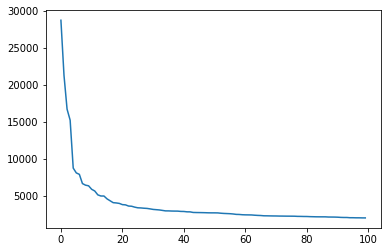

In [64]:
def plot_distri(arr, name):
    long_flag=False
    if len(arr.shape)==1:
        print('number of unique {}'.format(name), arr.unique().shape[0])
    else:
        
        print('number of unique {}'.format(name), arr.groupby(list(arr.columns)).ngroups)
        long_flag=True
    item_count={}
    for item in arr.values:

        if long_flag:
            it = tuple(item)
        else: 
            it=item
        
        if it not in item_count:
            item_count[it]=1
        else:
            item_count[it]+=1
    sorted_two_tuples=sorted(list(item_count.items()), key=lambda x:-x[1])
    print('Top 20:', sorted_two_tuples[:20])
    print()
    return sorted_two_tuples
#     plt.plot(sorted(item_count.values(),reverse=True))
print('total number of people', df.shape[0], end='\n\n')

plot_distri(df['diqu'], 'diqu （地区）')
plot_distri(df['core_guanzhi'],'guanzhi（官职)')
plot_distri(df['jigou_1'], 'jigou_1 （机构一）')
sorted_two_tuples=plot_distri(df[['jigou_1', 'core_guanzhi']], '(jigou_1, guanzhi) pair （机构一+官职）')
sorted_two_tuples2=plot_distri(df[['jigou_1', 'jigou_2','core_guanzhi']], '(jigou_1, jigou_2, guanzhi) tuple （机构一+机构二+官职）')
sorted_two_tuples3=plot_distri(df[['diqu','jigou_1','jigou_2','jigou_3','core_guanzhi']], 'all')
plt.plot(pd.DataFrame(sorted_two_tuples)[1][:100])
# print(df.groupby(['guanzhi', '', '']))

In [65]:
len(sorted_two_tuples3)

30076

# Modeling

In [5]:
import os
ppry_file=r'../data/pickles/ppry2.pkl'
if os.path.exists(ppry_file):
    print("read existing ppry.")
    ppry=pd.read_pickle(ppry_file)
else:
    print("construct and save new ppry.")
    ppry=df[['unique_id', 'diqu', 'jigou_1', 'jigou_2', 'jigou_3', 'core_guanzhi', 'pinji_detailed_numeric', 'year']] #person_position_rank_year
    open(ppry_file, 'a')
    ppry.to_pickle(ppry_file)

read existing ppry.


In [67]:
ppry.describe(include='all')

,unique_id,diqu,jigou_1,jigou_2,jigou_3,core_guanzhi,pinji_detailed_numeric,year
count,1.858742e+06,1858719,1848636,1534557,46899,1819514,1.858742e+06,1.858742e+06
unique,NaN,33,886,2918,377,4021,NaN,NaN
top,NaN,京師,翰林院衙門,額外司員,至聖廟官,訓導,NaN,NaN
freq,NaN,254635,43817,93415,8166,292749,NaN,NaN
mean,1.865949e+11,NaN,NaN,NaN,NaN,NaN,7.773186e+00,1.873551e+03
std,3.302259e+09,NaN,NaN,NaN,NaN,NaN,1.712638e+00,3.339575e+01
min,1.760400e+11,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.760750e+03
25%,1.851404e+11,NaN,NaN,NaN,NaN,NaN,7.000000e+00,1.858750e+03
50%,1.873412e+11,NaN,NaN,NaN,NaN,NaN,8.000000e+00,1.882750e+03
75%,1.890100e+11,NaN,NaN,NaN,NaN,NaN,9.000000e+00,1.897750e+03


## temporarily remove nan in jigou_1 and guanzhi

1. index all the positions

In [8]:
def combine(x):
    s=[]
    for item in x:
        if pd.notnull(item):
            s.append(item)
        else:
            s.append('不详')
    return '_'.join(s)
def combine2(row):
    x=[row['diqu'], row['jigou_1'], row['jigou_2'], row['jigou_3'], row['core_guanzhi']]
    s=[]
    for item in x:
        if pd.notnull(item):
            s.append(item)
        else:
            s.append('不详')
    return '_'.join(s)
combine(ppry[['diqu','jigou_1','jigou_2','jigou_3','core_guanzhi']].values[1])

'京師_宗人府_不详_不详_府丞'

In [70]:
pos = ppry[['diqu','jigou_1','jigou_2','jigou_3','core_guanzhi']].apply(combine, axis=1).unique()

In [71]:
print(len(pos))
print(pos[:3])
index_table={position: idx for idx, position in enumerate(pos)}

30076
['京師_宗人府_不详_不详_府丞' '京師_宗人府衙門_不详_不详_府丞' '京師_宗人府_經歷司_不详_主事']


1. construct A:
1) sum t for each edge -- T
2) count the # of each edge -- N
3) from N construct P -- P
4) use T, N, P to construct A -- A

In [72]:
N = {} # count the number of each edge
T = {} # sum the total time of each edge
for id_, subtable in tqdm(ppry.groupby('unique_id')):
    if subtable.shape[0] == 1:
        continue
    first = True
    pre_pos = None
    cur_pos = None
    pre_year = None
    cur_year = None
    for index, row in subtable.sort_values('year').iterrows():
        if first:
            first = False
            pre_pos = combine2(row)
            pre_year= index
            continue
        else:
            cur_pos = combine2(row)
            flow = (index_table[pre_pos], index_table[cur_pos])
            if flow[0] in N:
                count=N[flow[0]].get(flow[1])
                N[flow[0]][flow[1]] = count+1 if count else 1
                total_time=N[flow[0]].get(flow[1])
                T[flow[0]][flow[1]] = total_time + index - pre_year if total_time else index - pre_year          
            else:
                N[flow[0]]={flow[1]: 1}
                T[flow[0]]={flow[1]: index - pre_year}
            
            pre_pos = cur_pos
            pre_year = index

100%|█████████████████████████████████████████████████████████| 214719/214719 [08:20<00:00, 428.83it/s]


In [73]:
print(len(T))
print(len(N))

27327
27327


In [74]:
P={}
for pos1, row in tqdm(N.items()):
    s=sum(row.values())
    P[pos1]={}
    for pos2, count in row.items():
        P[pos1][pos2]=count/s

100%|████████████████████████████████████████████████████████| 27327/27327 [00:00<00:00, 217264.64it/s]


In [75]:
alpha=0.8
A={}
for pos1, row in tqdm(P.items()):
    A[pos1]={}
    for pos2, p in row.items():
        A[pos1][pos2]=(alpha**(T[pos1][pos2]/N[pos1][pos2]))*p

100%|████████████████████████████████████████████████████████| 27327/27327 [00:00<00:00, 119980.89it/s]


In [76]:
import numpy as np
mat_A=np.zeros((len(pos), len(pos)),dtype=np.float32)
for pos1, row in A.items():
    for pos2, a in row.items():
        mat_A[pos1, pos2]=a
print(mat_A.shape)

(30076, 30076)


In [13]:
pinji_iv={1: 16000, 1.5: 14500, 2: 13000, 2.5: 9500, 3: 6000, 3.5: 4850, 
 4: 3700, 4.5: 3050, 5: 2400, 5.5: 1825, 6: 1250, 6.5: 1225, 7:1200, 7.5:1000, 8: 100, 8.5: 90, 9: 80, 9.5:70, 10: 60}
print(len(pinji_iv))

19


assign intrinsic values according to: http://xh.5156edu.com/page/z8603m8110j19936.html

In [79]:
c=np.zeros(len(pos))
for idx, row in tqdm(ppry[['diqu','jigou_1','jigou_2','jigou_3','core_guanzhi', 'pinji_detailed_numeric']].iterrows()):
    c[index_table[combine2(row)]]=pinji_iv[row['pinji_detailed_numeric']] # c is going to be the intrinsic value vector
print(c[:10])

1858742it [05:36, 5518.85it/s]


[ 6000.  6000.  1250.  2400.  3700. 16000. 16000. 16000. 14500. 16000.]


一品 180两 180斛 16000两（总督） 290万
二品 155两 155斛 13000两（巡抚） 236万
三品 130两 130斛 6000两（按察史） 112万
四品 105两 105斛 3700两（道员） 70万
五品 80两 80斛 2400两（从四品知府） 46万
六品 60两 60斛 1250两（从五品知州） 25万
七品 45两 45斛 1200两（知县） 23万
八品 40两 40斛 2万1千
九品 33两1.14钱 33斛1.14斗 1万8千
未入流 31两5钱 31斛5斗 1万1千

In [80]:
import pickle

# write a file
f = open("../data/pickles/all_important_inter2.pickle", "wb") # index_table, A, T, N, P, c, pos
# for obj in [index_table, A, T, N, P, mat_A, c, pos]:
pickle.dump(index_table, f, protocol=4)
pickle.dump(A, f, protocol=4)
pickle.dump(T, f, protocol=4)
pickle.dump(N, f, protocol=4)
pickle.dump(P, f, protocol=4)
# pickle.dump(mat_A, f, protocol=4)
pickle.dump(c, f, protocol=4)
pickle.dump(pos, f, protocol=4)

f.close()

In [2]:
import pickle
# for loading the objects
f = open("../data/pickles/all_important_inter2.pickle", "rb")
index_table = pickle.load(f)
A = pickle.load(f)
T = pickle.load(f)
N = pickle.load(f)
P = pickle.load(f)
# mat_A = pickle.load(f, protocol=4)
c = pickle.load(f)
pos = pickle.load(f)
    
f.close()

# Final calculation of value

In [ ]:
for i in range(len(pos)):
    mat_A[i, i]= 1-mat_A[i,i]

In [ ]:
x=np.linalg.solve(mat_A, c) # unsolvable on PC, moved to server

In [3]:
import pickle
f = open("../data/pickles/x2_alpha08.pickle", "rb") 
x=pickle.load(f)
f.close()

In [4]:
x[:50]

array([ 7239.17762467,  5176.54153009,  -187.51028028,  6319.04355415,
        7922.87750181, 11803.27906528,  6557.37660707, 16000.        ,
        7220.15670947,  9099.80397756,  8625.24489952,  9218.44373824,
        8476.94520089,  9403.81835876,  9218.44373824,  8476.94520089,
       14182.58941456, 14032.64410467, 14460.43499082,  9500.        ,
       11498.69533951,   242.2654104 ,  6316.2983748 ,  2400.        ,
        1139.95607592,  -407.3218546 ,  -876.65053248, 14662.26040328,
         719.99389346,  1384.17143972,  1754.97068785,  -203.9765712 ,
        1222.7487731 , -2681.37456525, 10385.91115847,  4356.34955312,
        1200.        ,   749.04987061,  9411.72322813, 19312.46668352,
        2489.67163539, -1847.64708141, 10463.48984051,  6943.89679621,
        3195.12895712,  6527.57456465, 26534.19292695,  1325.85748853,
       -4088.43190532,  1825.        ])

In [87]:
c[:50]

array([ 6000.,  6000.,  1250.,  2400.,  3700., 16000., 16000., 16000.,
       14500., 16000., 16000., 16000., 16000., 16000., 16000., 16000.,
       13000., 13000., 14500.,  9500., 13000.,  1250.,  2400.,  2400.,
        1000.,  1000.,  1000.,  3700.,  1000.,  1250.,  1200.,  1200.,
        1200.,  2400.,  2400.,  1250.,  1200.,  1000.,  2400., 14500.,
        1200.,  1200., 13000.,  9500.,  9500., 13000., 14500.,  1000.,
        1825.,  1825.])

In [19]:
assert(len(pos)==len(c))
potential=x-c

In [17]:
counts=[]
vc=ppry[['diqu','jigou_1','jigou_2','jigou_3','core_guanzhi']].apply(combine, axis=1).value_counts()

In [ ]:
iv_pinji={}
for key, value in pinji_iv.items():
    iv_pinji[value]=key
for i in pos:
    counts.append(vc[i])
    result=[(x,y,z,iv_pinji[c[index_table[x]]])for x,y,z in list(zip(pos, potential, counts))]
result=pd.DataFrame(result, columns=['position', 'potential', 'occurrence', 'pinji'])
#Save result to .csv
f=open('../data/pickles/result2.pickle', 'wb')
pickle.dump(result, f)
f.close()

In [3]:
import pickle
result=None
with open('../data/pickles/result2.pickle', 'rb') as f:
    result=pickle.load(f)

In [94]:
# for pj in np.arange(3,10.5,0.5):
#     query_result=result[(result['occurrence']>10) & (result['pinji']==pj) ].sort_values(by='potential', ascending = False)
#     query_result.to_csv('../data/result_csv2/pinji_{}.csv'.format(pj), encoding="utf_8_sig", index=False)
result[result['occurrence']>10].sort_values(by='potential', ascending = False).to_csv('../data/result_csv2/all.csv'.format(pj), encoding="utf_8_sig", index=False)

In [32]:
result.head()

,position,potential,occurrence,pinji
0,京師_宗人府_不详_不详_府丞,1239.177625,3,3.0
1,京師_宗人府衙門_不详_不详_府丞,-823.458470,92,3.0
2,京師_宗人府_經歷司_不详_主事,-1437.510280,6,6.0
3,京師_刑部衙門_督捕司_不详_郎中,3919.043554,167,5.0
4,京師_鴻臚寺衙門_不详_不详_少卿,4222.877502,3,4.0


Visualization

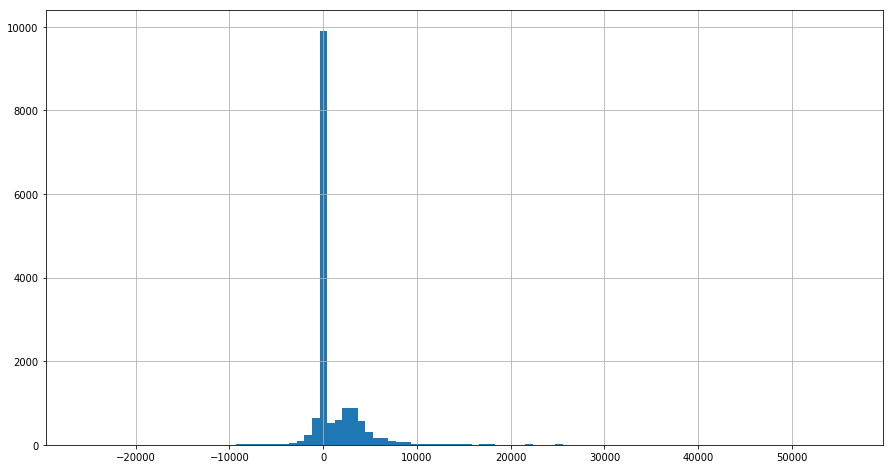

In [4]:
filtered_result=result[result['occurrence']>10].sort_values(by='potential', ascending = False)
filtered_result['potential'].hist(figsize=(15,8), bins=100)

Text(0,0.5,'potential')

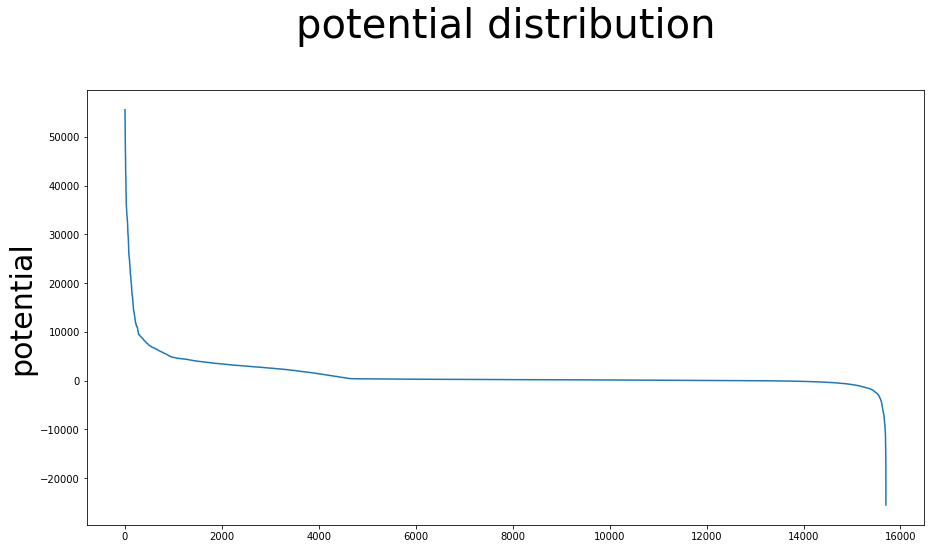

In [108]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(filtered_result.shape[0]), filtered_result['potential'])
plt.title('potential distribution\n', size=40)
plt.ylabel('potential', size=30)

Text(0.5,0,'index ranked by potential,\n i.e. 1-highest potential,\n 15701-lowest potential')

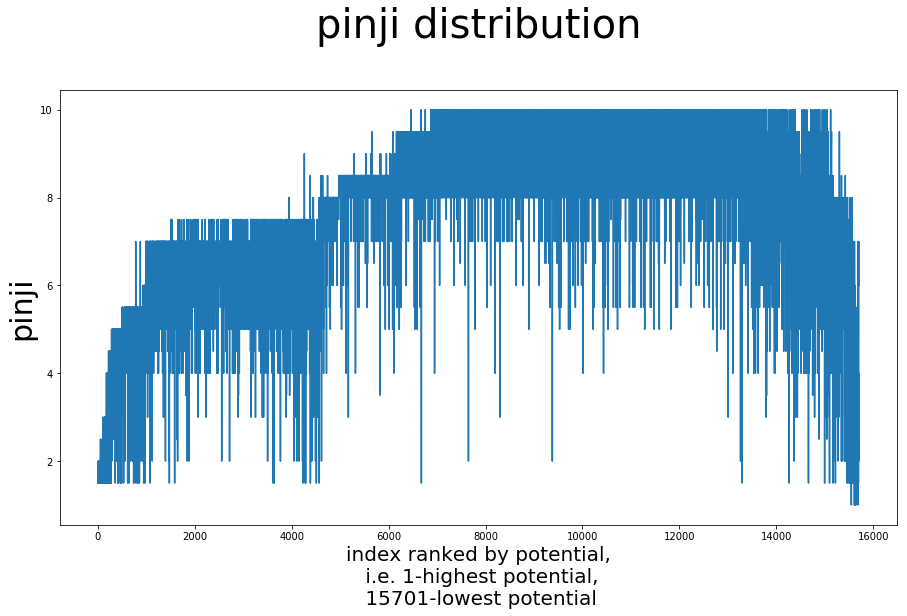

In [114]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(1, filtered_result.shape[0]+1), filtered_result['pinji'])
plt.title('pinji distribution\n', size=40)
plt.ylabel('pinji', size=30)
plt.xlabel('index ranked by potential,\n i.e. 1-highest potential,\n 15701-lowest potential', size=20)

### The best potential's are high-ranked, the worst too.



In [ ]:
print(('position', 'potential score', 'number of people'))
count=0
for r in sorted_result:
    if r[2]>10:
        print(r)
        count+=1
    if count>100:
        break

In [ ]:
总兵官，知府/同知/知州，副都御史

In [ ]:
count=0
year=0
for id_, subtable in tqdm(ppry.groupby('unique_id')):
    count+=1
    year+=(subtable['year'].max()-subtable['year'].min())

In [ ]:
np.array(potential).mean()

# Regional Analysis

In [7]:
ppry.columns

Index(['unique_id', 'diqu', 'jigou_1', 'jigou_2', 'jigou_3', 'core_guanzhi',
       'pinji_detailed_numeric', 'year'],
      dtype='object')

In [9]:
ppry['position'] = ppry[['diqu','jigou_1','jigou_2','jigou_3','core_guanzhi']].apply(combine, axis=1)

In [10]:
ppry.head(20)

,unique_id,diqu,jigou_1,jigou_2,jigou_3,core_guanzhi,pinji_detailed_numeric,year,position
181812,1.760400e+11,京師,宗人府,NaN,NaN,府丞,3.0,1760.75,京師_宗人府_不详_不详_府丞
181813,1.760400e+11,京師,宗人府,NaN,NaN,府丞,3.0,1761.50,京師_宗人府_不详_不详_府丞
181814,1.760400e+11,京師,宗人府衙門,NaN,NaN,府丞,3.0,1765.00,京師_宗人府衙門_不详_不详_府丞
181815,1.760400e+11,京師,宗人府,NaN,NaN,府丞,3.0,1765.75,京師_宗人府_不详_不详_府丞
181838,1.760400e+11,京師,宗人府,經歷司,NaN,主事,6.0,1760.75,京師_宗人府_經歷司_不详_主事
181839,1.760400e+11,京師,宗人府,經歷司,NaN,主事,6.0,1761.50,京師_宗人府_經歷司_不详_主事
181840,1.760400e+11,京師,宗人府,經歷司,NaN,主事,6.0,1760.75,京師_宗人府_經歷司_不详_主事
181841,1.760400e+11,京師,宗人府,經歷司,NaN,主事,6.0,1761.50,京師_宗人府_經歷司_不详_主事
181842,1.760400e+11,京師,刑部衙門,督捕司,NaN,郎中,5.0,1765.00,京師_刑部衙門_督捕司_不详_郎中
181843,1.760400e+11,京師,刑部衙門,督捕司,NaN,郎中,5.0,1765.75,京師_刑部衙門_督捕司_不详_郎中


In [13]:
ppry_with_potentials=ppry.join(result.set_index('position'), on='position', lsuffix='_original', rsuffix='_result')
ppry_with_potentials.reset_index(inplace=True)

In [35]:
regional_potentials=ppry_with_potentials[['diqu', 'potential']].groupby('diqu').agg(['mean', 'count'])['potential'].sort_values(by='mean', ascending=False)
regional_potentials[regional_potentials['count']>10]

,mean,count
diqu,,
甘肅新將,4491.114865,4334
吉林,2967.374823,1028
黑龍江,2670.072913,545
奉天,2256.355298,2637
山東,2034.968104,119162
雲南,1965.964707,71818
甘肅,1903.782246,47452
貴州,1830.842451,52302
京師,1561.083229,254635


In [53]:
top8=regional_potentials[regional_potentials['count']>10].reset_index()['diqu'].iloc[:9].tolist()
top8_province_county_potentials=ppry_with_potentials[ppry_with_potentials['diqu'].isin(top8)][['diqu', 'jigou_1', 'jigou_2', 'potential']].groupby(['diqu', 'jigou_1','jigou_2']).agg(['mean', 'count'])['potential'].reset_index()

In [61]:
top8_province_county_potentials[top8_province_county_potentials['diqu']=='甘肅新將'].sort_values(by='mean', ascending=False).head(20)

,diqu,jigou_1,jigou_2,mean,count
1633,甘肅新將,疏勒府,巴楚州,6821.022596,18
1621,甘肅新將,提學司,實業科,4800.000358,2
1623,甘肅新將,提學司,省視學,4500.000335,4
1636,甘肅新將,莎車府,皮山縣,3302.490016,28
1622,甘肅新將,提學司,會計科,2700.000201,4
1616,甘肅新將,和闐直隸州,于闐縣,2560.901395,78
1630,甘肅新將,焉耆府,輪臺縣,2536.247696,45
1619,甘肅新將,庫車直隸州,沙雅縣,2463.342873,26
1632,甘肅新將,疏勒府,伽師縣,2402.628425,50
1625,甘肅新將,溫宿府,拜城縣,2360.242940,51


In [62]:
top8_province_county_potentials[top8_province_county_potentials['diqu']=='山東'].sort_values(by='mean', ascending=False).head(20)

,diqu,jigou_1,jigou_2,mean,count
1228,山東,兗州府,曲阜縣,11895.432714,9263
1253,山東,提學司,會計科,6107.418644,10
1254,山東,提學司,省視學,4800.000358,2
1252,山東,提學司,普通科,3997.792111,10
1240,山東,兗州府,總河部院衙門,3306.883552,24
1256,山東,提法司,勸業道,3111.709326,20
1299,山東,武定府,濱州,2107.691332,757
1369,山東,登州府,甯海州,2046.071270,555
1257,山東,提法司,巡警道,1987.621730,24
1323,山東,濟南府,德州,1900.657130,1095


In [63]:
top8_province_county_potentials[top8_province_county_potentials['diqu']=='雲南'].sort_values(by='mean', ascending=False).head(20)

,diqu,jigou_1,jigou_2,mean,count
1823,雲南,提法司,勸業道,14800.001103,2
1942,雲南,麗江府,鶴慶州,9749.080915,735
1820,雲南,提學司,普通科,9600.000715,2
1868,雲南,楚雄府,石膏井,4413.005509,68
1819,雲南,提學司,專門科,4000.000298,2
1891,雲南,永昌府,騰越廳,3717.856619,887
1821,雲南,提學司,會計科,3426.666922,6
1817,雲南,提學司,圖書科,3345.697231,6
1824,雲南,提法司,巡警道,3019.880592,18
1862,雲南,楚雄府,姚州,2557.352637,552


In [64]:
top8_province_county_potentials[top8_province_county_potentials['diqu']=='甘肅'].sort_values(by='mean', ascending=False).head(20)

,diqu,jigou_1,jigou_2,mean,count
1494,甘肅,甘肅新將,英吉沙爾直隸廳,36474.093840,3
1526,甘肅,蘭州府,河州,4758.468956,881
1456,甘肅,提法司,巡警道,4401.783633,20
1600,甘肅,鞏昌府,洮州廳,4116.814008,479
1479,甘肅,甘州府,安西直隸州,3770.531990,4
1500,甘肅,甯夏府,靈州,3530.708635,390
1455,甘肅,提學司,總務科,3464.651418,8
1450,甘肅,提學司,圖書科,3345.697231,6
1448,甘肅,慶陽府,甯州,3202.644500,302
1489,甘肅,甘州府,鎮西廳,2964.867883,130


In [65]:
top8_province_county_potentials[top8_province_county_potentials['diqu']=='貴州'].sort_values(by='mean', ascending=False).head(20)

,diqu,jigou_1,jigou_2,mean,count
1699,貴州,提學司,專門科,9600.000715,2
1652,貴州,大定府,威甯州,8450.484086,709
1698,貴州,提學司,實業科,5000.000373,2
1702,貴州,提學司,總務科,4960.000370,4
1715,貴州,興義府,盤州廳,4535.293179,24
1703,貴州,提法司,巡警道,3337.917607,22
1700,貴州,提學司,普通科,3066.666895,6
1701,貴州,提學司,會計科,3018.545697,4
1717,貴州,興義府,興豊州,2642.457426,28
1718,貴州,興義府,貞豊州,2545.405655,469


In [67]:
top8_province_county_potentials[top8_province_county_potentials['diqu']=='京師'].sort_values(by='mean', ascending=False).head(40)

,diqu,jigou_1,jigou_2,mean,count
717,京師,海軍處,籌辦海軍事務處,41844.421577,4
979,京師,郵傳部衙門,郵政局,34666.669250,3
337,京師,外務部衙門,駐俄使館,29650.002209,4
195,京師,兵部衙門,各省駐京提塘,19400.001445,2
1073,京師,鑾儀衛衙門,右所,14026.578249,3
900,京師,資政院衙門,奏調人員,11333.334178,6
495,京師,憲政編查館,官報局印刷科科員,11228.043450,14
738,京師,禮部衙門,已裁鴻臚寺,10353.130120,1
783,京師,總理各國事務衙門,章京上行走,9739.649850,8
752,京師,稅務處,前班四等幫辦,9600.000715,2


Text(0,0.5,'potential')

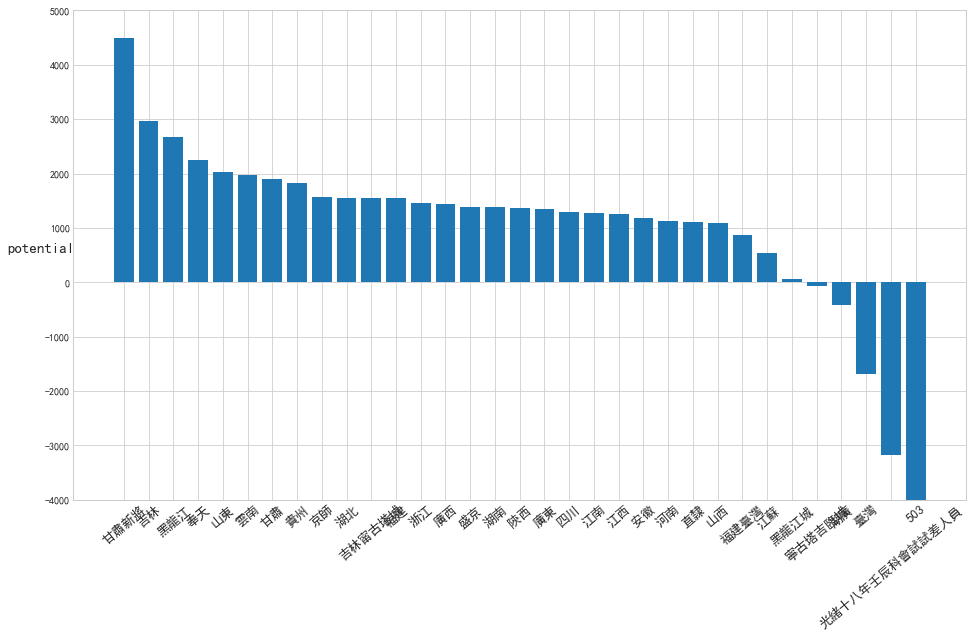

In [79]:
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(16,9))
plt.bar(np.arange(regional_potentials.shape[0]), regional_potentials['mean'])
_=plt.xticks(np.arange(regional_potentials.shape[0]), regional_potentials.index.tolist(), rotation=40, size=13)
_=plt.ylim(-4000, 5000)
plt.ylabel('potential', size=15,rotation=0)

1. 云南/甘肃/贵州，曲阜，

In [129]:
ppry_with_potentials[['diqu', 'jigou_1', 'jigou_2', 'potential']].groupby(['diqu', 'jigou_1','jigou_2']).agg(['mean', 'count'])['potential'].sort_values(by='mean', ascending=False)

mean  count
diqu jigou_1                     jigou_2                         
京師   海軍處                         籌辦海軍事務處      41844.421577      4
甘肅   甘肅新將                        英吉沙爾直隸廳      36474.093840      3
京師   郵傳部衙門                       郵政局          34666.669250      3
     外務部衙門                       駐俄使館         29650.002209      4
江南   蘇州府                         提學司          24000.001788      2
京師   兵部衙門                        各省駐京提塘       19400.001445      2
廣東   提法司                         勸業道          14800.001103      2
雲南   提法司                         勸業道          14800.001103      2
京師   鑾儀衛衙門                       右所           14026.578249      3
黑龍江  璦琿道                         黑河府          12200.000909      2
吉林   提學司                         圖書科          12200.000909      2
山東   兗州府                         曲阜縣          11895.432714   9263
江南   蘇州府                         江蘇布政司衙門      11891.430592    198
京師   資政院衙門                       奏調人員         11333.334178      6
     憲政編查館                       官報局印刷科科員     11228.043450     14
     禮部衙門                        已裁鴻臚寺        10353.130120      1
黑龍江  呼倫道                         臚濱府          10256.805491      7
雲南   麗江府                         鶴慶州           9749.080915    735
京師   總理各國事務衙門                    章京上行走         9739.649850      8
     稅務處                         後班二等幫辦        9600.000715      2
                                 後班三等幫辦        9600.000715      6
     鑾儀衛衙門                       靜鞭管理          9600.000715      2
貴州   提學司                         專門科           9600.000715      2
雲南   提學司                         普通科           9600.000715      2
京師   稅務處                         前班四等幫辦        9600.000715      2
福建   提學司                         普通科           9600.000715      2
浙江   提法司                         典獄科           9600.000715      2
京師   禮部衙門                        禮器庫           8886.150897     16
     光緒二十八年壬寅科補行庚子辛醜恩正?科郷試各省試差人員 浙江正主考         8880.725287      1
山西   提學司                         總務科           8550.000637      4
...                                                    ...    ...
直隸   保定府省會                       豊潤縣          -8197.744305      2
江蘇   江蘇巡撫部院                      布政司衙門        -8242.773925      6
京師   光緒二十年甲午恩科會試試差人員             正考官          -8993.257283      1
奉天   鳯凰直隸廳                       莊河廳          -9171.657491      1
京師   會典館                         候補漢總纂官       -9284.903774      1
     光緒二十八年壬寅科補行庚子辛醜恩正順天郷試試差人員   副考官          -9457.396814      2
     光緒二十八年補庚子恩科各省郷試試差人員         浙江正主考        -9544.580371      1
     弼德院衙門                       顧問大臣         -9641.587311      3
     內閣                          內閣衙門大學士     -10922.954656     32
     練兵處                         軍政司         -10944.137612      6
     軍諮府衙門                       各省軍事參議官     -11320.000169      7
     總理海軍事務衙門                    北洋海軍提督左右翼總兵 -11527.786887      2
臺灣   臺灣府                         澎湖廳         -12180.027570      2
京師   翰林院衙門                       協辦大學士       -12184.183104      3
     光緒二十八年壬寅科補行庚子辛醜恩正?科郷試各省試差人員 江西正主考       -12201.565044      1
     政務處                         參豫政務        -12249.661149      7
     光緒二十八年補庚子恩科各省郷試試差人員         江南正主考       -13254.428640      1
     光緒二十八年壬寅科補行庚子辛醜恩正?科郷試各省試差人員 江南正主考       -13254.428640      1
     玉牒館                         副總裁         -13254.428640      1
     光緒二十九年補行辛醜壬寅恩正並科會試試差人員      正總裁         -14018.319659      1
                                 副總裁         -14412.103597      2
     光緒二十九年癸卯科順天郷試試差人員           副考官         -16026.930030      1
     翰林院衙門                       學士          -19044.824331      1
山東   濟甯直隸州                       總?部院衙門      -19875.923699      1
京師   光緒三十年甲辰科會試試差人員              副總裁         -20710.044442      1
     光緒二十九年癸卯科各省郷試試差人員           江西省         -21227.354658      1
     總理各國事務衙門                    北洋海軍提標      -37679.479948      3
     總兵處                         軍令司         -38398.481424      1
     海軍處                    

In [ ]:
year_potentials

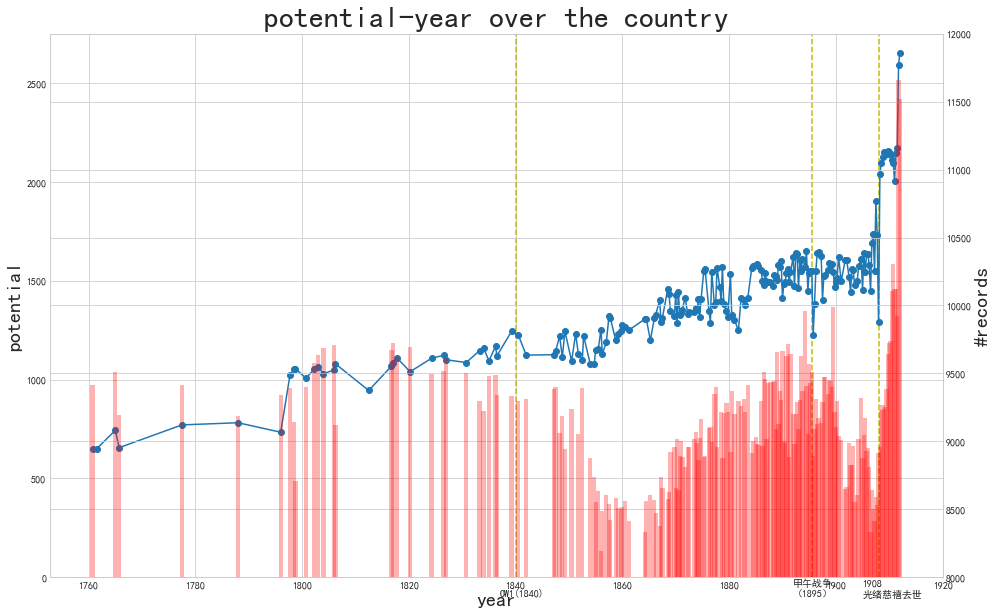

In [128]:
plt.figure(figsize=(16,10))
year_potentials=ppry_with_potentials[['year', 'potential']].groupby('year').agg(['mean', 'count'])['potential'].sort_values(by='mean', ascending=False)
year_potentials.reset_index(inplace=True)
year_potentials.sort_values('year', inplace=True)
ax1=plt.gca()
plt.ylabel('potential', size=20)
plt.xlabel('year', size=20)
plt.ylim(0,2750)
plt.title('potential-year over the country', size=30)
plt.axvline(x=1840, color='y', linestyle='--')
plt.text(1840-3, -100, 'OW1(1840)')
plt.axvline(x=1895.5, color='y', linestyle='--')
plt.text(1895-3, -100, '甲午战争、\n（1895）')
plt.axvline(x=1908, color='y', linestyle='--')
plt.text(1908-3, -100, '1908\n光绪慈禧去世')
ax2=ax1.twinx()
ax2.bar(year_potentials['year'], year_potentials['count'], color='r', alpha=.3)
ax2.set_ylim(8000, 12000)
ax2.set_ylabel('#records', size=20)
ax1.plot(year_potentials['year'], year_potentials['mean'], '-o')


Text(1893,-100,'1882')

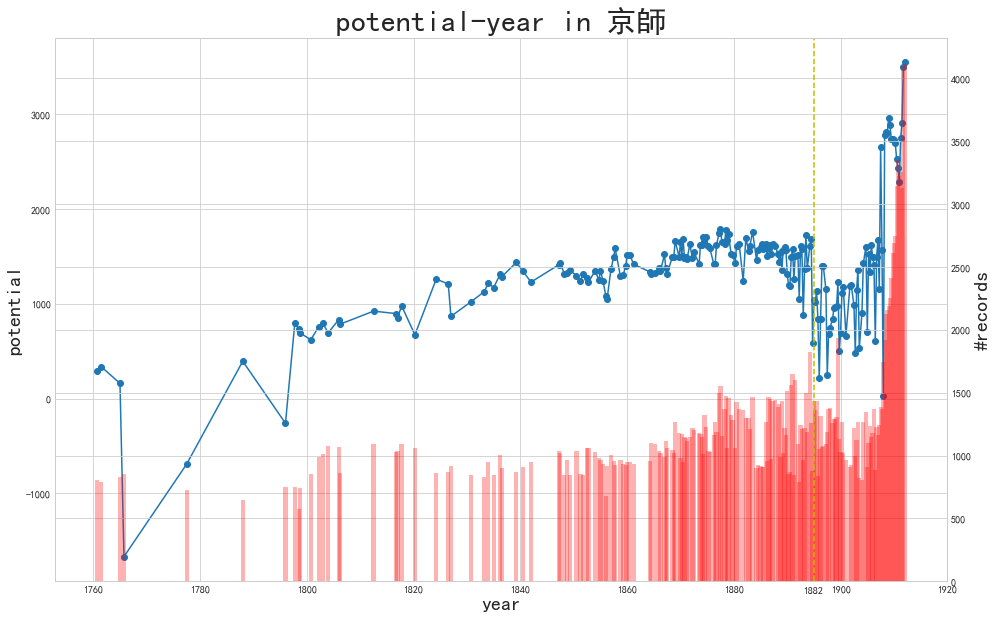

In [119]:
plt.figure(figsize=(16,10))
ppry_with_potentials_central=ppry_with_potentials[ppry_with_potentials['diqu']=='京師']
year_potentials=ppry_with_potentials_central[['year', 'potential']].groupby('year').agg(['mean', 'count'])['potential'].sort_values(by='mean', ascending=False)
year_potentials.reset_index(inplace=True)
year_potentials.sort_values('year', inplace=True)
ax1=plt.gca()
plt.ylabel('potential', size=20)
plt.xlabel('year', size=20)
# plt.ylim(-500,2750)
plt.title('potential-year in 京師', size=30)
ax2=ax1.twinx()
ax2.bar(year_potentials['year'], year_potentials['count'], color='r', alpha=.3)
# ax2.set_ylim(8000, 12000)
ax2.set_ylabel('#records', size=20)
ax1.plot(year_potentials['year'], year_potentials['mean'], '-o')
# plt.axvline(x=1895, color='y', linestyle='--')
# plt.text(1893, -100, '1895')

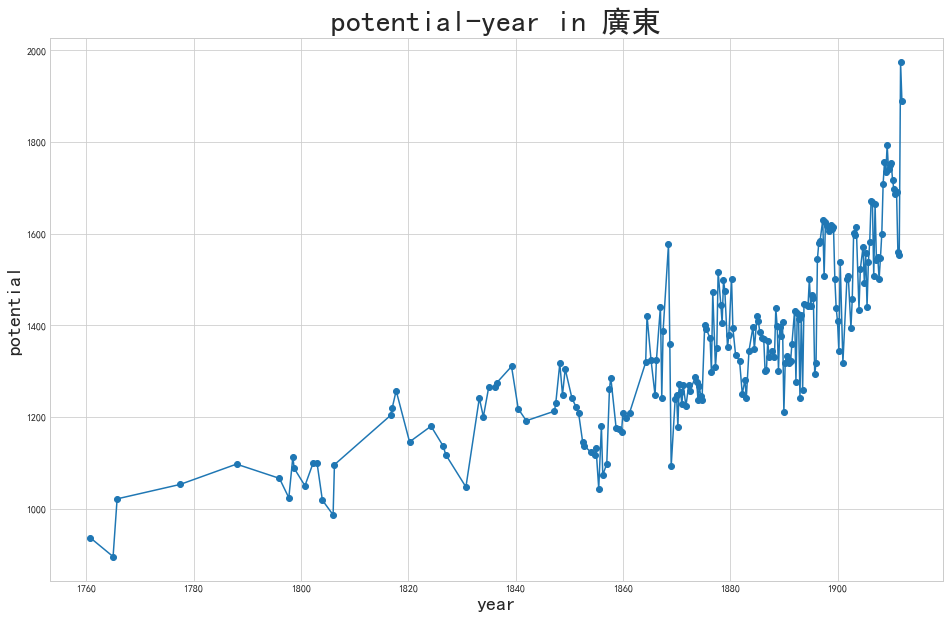

In [117]:
plt.figure(figsize=(16,10))
ppry_with_potentials_central=ppry_with_potentials[ppry_with_potentials['diqu']=='廣東']
year_potentials=ppry_with_potentials_central[['year', 'potential']].groupby('year').agg(['mean', 'count'])['potential'].sort_values(by='mean', ascending=False)
year_potentials.reset_index(inplace=True)
year_potentials.sort_values('year', inplace=True)
ax1=plt.gca()
plt.ylabel('potential', size=20)
plt.xlabel('year', size=20)
# plt.ylim(-500,2750)
plt.title('potential-year in 廣東', size=30)
# ax2=ax1.twinx()
# ax2.bar(year_potentials['year'], year_potentials['count'], color='r', alpha=.3)
# ax2.set_ylabel('#records', size=20)
ax1.plot(year_potentials['year'], year_potentials['mean'], '-o')
# plt.axvline(x=1895, color='y', linestyle='--')
# plt.text(1893, -100, '1895')

# For Visualization

## 1. For the whole network

In [ ]:
import networkx as nx
def flatten_dict(d):
    res=[]
    for key, item in tqdm(d.items()):
        res.append((*key, item))
    return res
g=nx.DiGraph()
g.add_weighted_edges_from(flatten_dict(flow_count))

In [ ]:
(len(list(g.nodes)), len(list(g.edges)))

In [ ]:
nx.write_gexf(g, r'../data/gephi/pos_network.gexf')

## 2. For subgraph

In [ ]:
def create_subgraph(start_pos, graph, pos, depth=5):
    # do a BFS, start_pos IS AN INDEX! NOT A NAME!
    subgraph=[] # used to store edges
    this_layer=[] # store the nodes to be traced further
    next_layer=[start_pos]
    past={start_pos:1} # store every nodes seen before
    for layer in range(depth):
        this_layer=next_layer.copy()
        next_layer=[]
        if len(this_layer)==0:
            break
        for pos1 in this_layer:
            row=graph.get(pos1)
            if row:
                for pos2, count in row.items():
                    subgraph.append((pos[pos1], pos[pos2], count))
                    if pos2 not in past:
                        past[pos2]=1
                        next_layer.append(pos2)
                        
                    
                
                
                
    return subgraph

In [ ]:
import networkx as nx
position_name='江甯府 南捕通判'
r=create_subgraph(index_table[position_name], N, pos, depth=3)
print(len(r))
print(sorted(r))
subg=nx.DiGraph()
subg.add_weighted_edges_from(r)
nx.write_gexf(subg, r'../data/gephi/subgraph_{}.gexf'.format(position_name))

## Micro Measurement: in unit of shortest segment with length 1

In [ ]:
%%script false
pos_score={} #{pos->[promotions, count]}
duplicate_count=0
for id_, subtable in tqdm(ppry.groupby('unique_id')):
    
    pre_year=None
    pre_pinji=None
    pre_pos=None
    for index, row in subtable.sort_values('year').iterrows():
#         print(row)
        if not pre_year:
            pre_year=row['year']
            pre_pinji=row['pinji_detailed_numeric']
            pre_pos=(row['jigou_1'], row['guanzhi'])
        else:
            promotion=-(row['pinji_detailed_numeric']-pre_pinji) # if get promoted, the numeric value of rank actually decreases
            time=row['year']-pre_year
            if time==0:
                duplicate_count+=1
                #update tracking variables
                pre_year=row['year']
                pre_pinji=row['pinji_detailed_numeric']
                continue
            
            # update pos_score for pre_pose
            if pre_pos in pos_score:
                pos_score[pre_pos][0]+=(promotion/time)
                pos_score[pre_pos][1]+=1
            else:
                pos_score[pre_pos]=[promotion/time, 1]
                
            #update tracking variables
            pre_year=row['year']
            pre_pinji=row['pinji_detailed_numeric']
            pre_pos=(row['jigou_1'], row['guanzhi'])

In [ ]:
print(duplicate_count)

In [ ]:
pos_score_micro=pos_score
pos_normscore={}
curoff_occurences=100
for key, value in pos_score_micro.items():
    if value[1]<curoff_occurences: # MUST do this filteration to remove noise: remove occurences < 5
        continue
    pos_normscore[key]=[value[0]/value[1], value[1]]
pos_ranking_micro=sorted(list(pos_normscore.items()), key=lambda x: -x[1][0])
from pprint import pprint
pprint(pos_ranking_micro[:30])

Note: a minor problem remains unsolved: duplicate record a specific person in a specific year

## Local Measurement: in unit of a person

In [ ]:
import random

pos_score={} #{pos->[promotions, count]}
duplicate_count2=0
for id_, subtable in tqdm(ppry.groupby('unique_id')):
    # sample a subset to reduce size
#     if random.uniform(0, 1)>0.1:
#         continue
        
        
    st=list(subtable.sort_values('year').T.to_dict().values())
    length=len(st)
    for idx, row1 in enumerate(st):
        if idx>=length-1:
            break
            
        #start calculating for a specific position in one person's career
        pos=(row1['jigou_1'], row1['guanzhi'])
        score=0
        count=0
        cur_pinji=row1['pinji_detailed_numeric']
        cur_year=row1['year']
        for row2 in st[idx+1:]:
            promotion=-(row2['pinji_detailed_numeric']-cur_pinji) # if get promoted, the numeric value of rank actually decreases
            time=row2['year']-cur_year
            if time==0:
                continue
            score+=promotion/time
            count+=1
            
        if count==0:
            duplicate_count2+=1
            continue
        # update pos_score
        if pos in pos_score:
            pos_score[pos][0]+=(score/count)
            pos_score[pos][1]+=1
        else:
            pos_score[pos]=[score/count, 1]
                

In [ ]:
pos_score_local=pos_score
pos_normscore={}
curoff_occurences=100
for key, value in pos_score_local.items():
    if value[1]<curoff_occurences: # MUST do this filteration to remove noise: remove occurences < 5
        continue
    pos_normscore[key]=[value[0]/value[1], value[1]]
pos_ranking_local=sorted(list(pos_normscore.items()), key=lambda x: -x[1][0])
from pprint import pprint
pprint(pos_ranking_local[:30])

In [ ]:
count=0
for id_, subtable in tqdm(ppry.groupby('unique_id')):
    if '小京官' in subtable['guanzhi'].unique() and '農工商部衙門' in subtable['jigou_1'].unique():
        print(subtable.sort_values(by='year')[['jigou_1','guanzhi' ,'pinji_detailed_numeric', 'year']])
        count+=1
#     if count>3:
#         break

In [82]:
np.__version__

'1.14.2'